<a href="https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/main/Modulo%204%20-%20Machine%20Leaning/code/ML_08_HoG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import cv2

# Part 1: Example

(349, 352, 3)
2
255


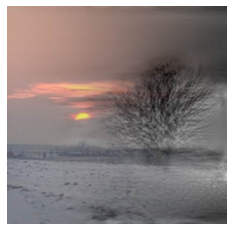

In [2]:
# Read example texture image in color
IMG1 = imread('Image_OT.jpg')
print(IMG1.shape)
print(IMG1.min())
print(IMG1.max())

plt.imshow(IMG1)
plt.axis('off')
plt.show()

(349, 352)
0.023797254901960784
0.8730619607843138


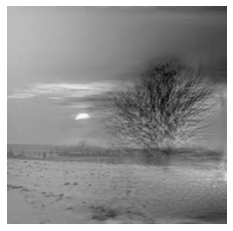

In [3]:
# Read example texture image
IMG1 = imread('Image_OT.jpg', as_gray='True')
print(IMG1.shape)
print(IMG1.min())
print(IMG1.max())

plt.imshow(IMG1, cmap='gray')
plt.axis('off')
plt.show()

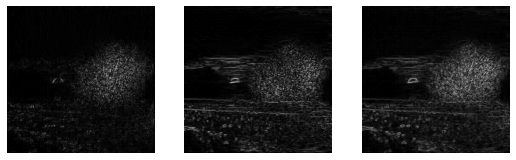

In [4]:
# Calculate gradient
dx = cv2.Sobel(np.float32(IMG1), cv2.CV_32F, 1, 0, ksize=1)
dy = cv2.Sobel(np.float32(IMG1), cv2.CV_32F, 0, 1, ksize=1)

# Show images
plt.figure(figsize=(9, 18))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(dx), cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(np.abs(dy), cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(dx)+np.abs(dy), cmap='gray')
plt.axis('off')
plt.show()

(349, 352)
(349, 352)
0.0
0.27912092
0.0
359.9637


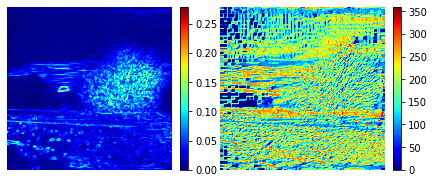

In [5]:
# Compute magnitude and angle per pixel
magn, angl = cv2.cartToPolar(dx, dy, angleInDegrees=True)

print(magn.shape)
print(angl.shape)

print(magn.min())
print(magn.max())
print(angl.min())
print(angl.max())

# Plot them
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[7, 3])
axins = inset_axes(ax1, width="5%", height="100%", loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax1.transAxes, borderpad=0)
im1 = ax1.imshow(magn, cmap='jet')
ax1.set_axis_off()
fig.colorbar(im1, cax=axins)
axins = inset_axes(ax2, width="5%", height="100%", loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes, borderpad=0)
im1 = ax2.imshow(angl, cmap='jet')
ax2.set_axis_off()
fig.colorbar(im1, cax=axins)
plt.show()

In [6]:
# Use skimage instead
from skimage.feature import hog
from skimage.transform import resize
IMG2 = resize(IMG1, (64, 128))

hog_desc, hog_img = hog(IMG2, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)
print(hog_desc.shape)

(3780,)


(64, 128)


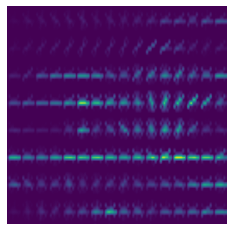

In [7]:
# Plot image
print(hog_img.shape)
hog_img = resize(hog_img, (349, 352))

plt.imshow(hog_img)
plt.axis('off')
plt.show()

In [8]:
# Some refs:
# https://www.learnopencv.com/histogram-of-oriented-gradients/
# https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/
# https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

# Part 2: Load data

In [ ]:
from os import listdir
from os.path import join
from sklearn.metrics import pairwise_distances

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# Dataset Caltech 101
# Source: http://www.vision.caltech.edu/Image_Datasets/Caltech101/Caltech101.html

# Bajar datos, y descomprimirlos. Ponerlos en una carpeta llamda "Caltech_101"

In [ ]:
# Find the name of each class
base_path = "Caltech_101"
class_names = listdir(base_path)
print("Num of classes:", len(class_names))

Num of classes: 102


In [ ]:
# Load first 40 images from first class and a label for the class
print(class_names[0])
file_names1 = [join(base_path, class_names[0], f) for f in listdir(join(base_path, class_names[0]))]
X1 = np.array([resize(imread(f, as_gray='True'), (300, 200)) for f in file_names1[:40]])
Y1 = np.zeros((len(X1)))
print(X1.shape)
print(Y1.shape)

soccer_ball
(40, 300, 200)
(40,)


In [ ]:
# Load first 40 images from second class and a label for the class
print(class_names[1])
file_names2 = [join(base_path, class_names[1], f) for f in listdir(join(base_path, class_names[1]))]
X2 = np.array([resize(imread(f, as_gray='True'), (300, 200)) for f in file_names2[:40]])
Y2 = np.ones((len(X2)))
print(X2.shape)
print(Y2.shape)

pizza
(40, 300, 200)
(40,)


In [ ]:
# Concatenate data
X = np.concatenate((X1, X2))
Y = np.concatenate((Y1, Y2))
print(X.shape)
print(Y.shape)

(80, 300, 200)
(80,)


In [ ]:
# Now we have elemets from two classes, 40 per class.

# Part 3: Classification

In [ ]:
# %reset
import numpy as np
import matplotlib.pyplot as plt
import cv2
from os import listdir
from os.path import join
from skimage.io import imread
from skimage.feature import hog
from skimage.transform import resize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# == Q1 ==
# Encuentra una manera de cargar 40 imágenes por cada clase del dataset Caltech 101 y almancenarlas en un sólo tensor X.
# Tú decide el tamaño de cada imágen. Asigna una etiqueta (números enteros) a cada clase, y crea el vector Y cuya longitud
# sea igual a X, y en donde cada elemento de Y indique la clase de su correspondiente imagen en X.
# Reporta las longitudes de los arreglo X e Y, el tamaño de las imagénes, y los valores mínimo y máximo de la magnitud de
# los píxeles.

In [ ]:
# Find the name of each class
base_path = "Caltech_101"
class_names = listdir(base_path)
print("Num of classes:", len(class_names))

# Load first 40 images from each class and label them
nrows = 349
ncols = 352
X = np.empty(shape=(0, nrows, ncols))
Y = np.empty(shape=(0))
for cl in range(len(class_names)):
    files = [join(base_path, class_names[cl], f) for f in listdir(join(base_path, class_names[cl]))]
    X1 = np.array([resize(imread(f, as_gray='True'), (nrows, ncols)) for f in files[:40]])
    X = np.concatenate((X, X1))
    Y = np.concatenate((Y, cl * np.ones((len(X1)))))
print(X.shape)
print(X.min())
print(X.max())
print(Y.shape)
print(Y.min())
print(Y.max())

Num of classes: 102
(4009, 349, 352)
0.0
1.0000000000000002
(4009,)
0.0
101.0


In [ ]:
# Divide el set anterior en sets entrenamiento, validación y prueba.
# Tú decide los tamaños de cada set.

In [ ]:
# == Q2 ==
# Ahora calcula los descriptores HoG para las imágenes en X (tú decide si las rescalas o no)
# Usando grid search, evalua el impacto sobre la exactitud de clasificación kNN de los siguientes parámetros
# orientations = 4, 9, 16,
# cells_per_block = (1, 1), (2, 2), (3, 3)
# Reporta los resultados en una tabla - entrenamiento y validación

In [ ]:
# Revisa accuracy con distintos valores de parámetros
print(f"\t \t Cells per block")
print(f"Orientations:\t 1x1 \t 2x2 \t 3x3")
for orient in [4, 9, 16]:
    print(f"\t {orient:2d} \t", end='')
    for cells in [1, 2, 3]:
        X_HOG = np.array([hog(img, orientations=orient, pixels_per_cell=(8, 8), cells_per_block=(cells, cells)) for img in X])
        kNN = KNeighborsClassifier(n_neighbors=1)
        kNN.fit(X_HOG, Y)
        print(f"{kNN.score(X_HOG, Y):4.2f}", end='\t', flush=True)
    print('')

	 	 Cells per block
Orientations:	 1x1 	 2x2 	 3x3
	  4 	1.00	1.00	1.00	
	  9 	1.00	1.00	1.00	
	 16 	1.00	1.00	1.00	


In [ ]:
# == Q3 ==
# ¿El cambio en el valor de los parámetros evaluados en la pregunta anterior tiene algún impacto en la longitud del
# descriptor? ¿Por qué?

In [ ]:
# Revisa tamaño con una sola imagen: process just 1 image
print(f"\t \t Cells per block")
print(f"Orientations:\t 1x1 \t 2x2 \t 3x3")
for orient in [4, 9, 16]:
    print(f"\t {orient:2d} \t", end='')
    for cells in [1, 2, 3]:
        h = hog(X[0], orientations=orient, pixels_per_cell=(8, 8), cells_per_block=(cells, cells))
        print(f"{h.shape}", end='\t', flush=True)
    print('')

	 	 Cells per block
Orientations:	 1x1 	 2x2 	 3x3
	  4 	(7568,)	(28896,)	(61992,)	
	  9 	(17028,)	(65016,)	(139482,)	
	 16 	(30272,)	(115584,)	(247968,)	


In [ ]:
# Sí. Como indica la tabla anterior, ambos parámetros influyen en el tamaño del descriptor.
# El número de orientaciones indica el número de bins en el histograma de cada celda. Entre mayor sea, más largo es el descriptor.
# Y el número de celdas por bloque, indica cuantos histogramas se concatenan juntos. Entre mayor sea, más largo es el descriptor.

In [ ]:
# == Q4 ==
# Muestra la matriz de confusión para la mejor combinación de parámetros de HoG
# Aplicalo al set de pueba y reporta el resultado final.

Accuracy: 1.0
(4009,)
(102, 102)


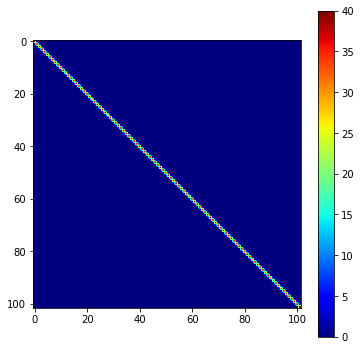

In [ ]:
# Igual podemos elegir la más corta
X_HOG = np.array([hog(img, orientations=4, pixels_per_cell=(8, 8), cells_per_block=(1, 1)) for img in X])
kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X_HOG, Y)
print(f"Accuracy: {kNN.score(X_HOG, Y)}")
y_hat = kNN.predict(X_HOG)
print(y_hat.shape)

# Confusion matrix
CM = confusion_matrix(Y, y_hat)
print(CM.shape)

plt.figure(figsize=(6, 6))
plt.imshow(CM, cmap='jet')
plt.colorbar()
plt.show()

In [9]:
# Some extra refs for more datasets:
# https://analyticsindiamag.com/10-open-datasets-you-can-use-for-computer-vision-projects/
# http://www.cvpapers.com/datasets.html